# Logistic Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
test = pd.read_csv('titanic_test.csv')
test.assign(survived=[1 if i < 200 else 0 for i in range(len(test))])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


## Les Données

Commençons par lire le fichier titanic_train.csv dans un dataframe pandas.

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1) PassengerId - Identifiant unique pour chaque passager
2) Survived - Indique si le passager a survécu (0 = Non, 1 = Oui)
3) Pclass - Classe du passager (1 = 1ère, 2 = 2ème, 3 = 3ème) - indicateur du statut socio-économique
4) Name - Nom du passager
5) Sex - Genre du passager
6) Age - Âge en années
7) SibSp - Nombre de frères/soeurs/époux à bord
8) Parch - Nombre de parents/enfants à bord
9) Ticket - Numéro de ticket
10) Fare - Prix du billet
11) Cabin - Numéro de cabine (beaucoup de valeurs manquantes)
12) Embarked - Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton)

# Analyse Exploratoire des Données

Commençons l'analyse exploratoire des données ! Nous allons d'abord examiner les données manquantes !

## Données Manquantes

Nous pouvons utiliser seaborn pour créer une heatmap simple afin de visualiser où se trouvent les données manquantes !

In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


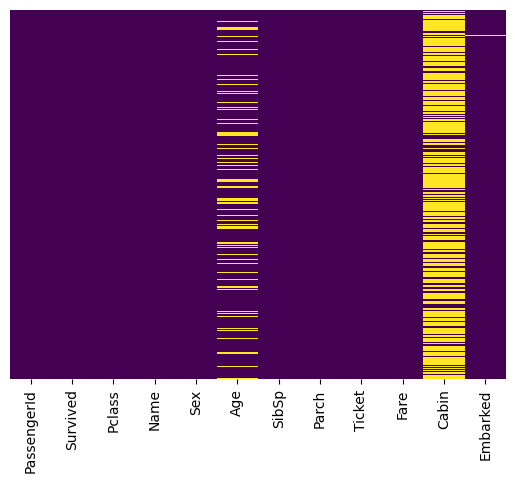

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Environ 20 pour cent des données d'Âge sont manquantes. La proportion de données manquantes pour l'Âge est probablement suffisamment faible pour permettre un remplacement raisonnable par une forme d'imputation. En regardant la colonne Cabine, il semble que nous ayons trop de données manquantes pour en faire quelque chose d'utile au niveau basique. Nous allons probablement supprimer cette colonne plus tard, ou la transformer en une autre caractéristique comme "Cabine Connue: 1 ou 0".

Continuons en visualisant davantage de données ! Regardez la vidéo pour des explications complètes sur ces graphiques, ce code sert uniquement de référence.

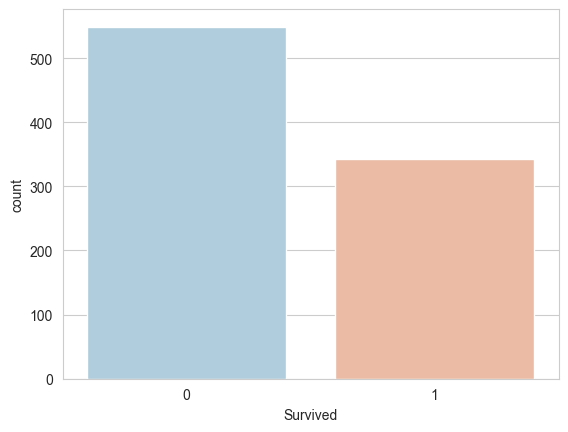

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Survived', palette='RdBu_r', legend=False)
plt.show()

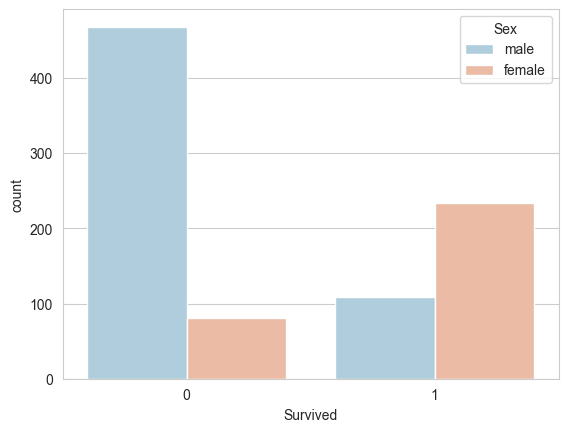

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.show()

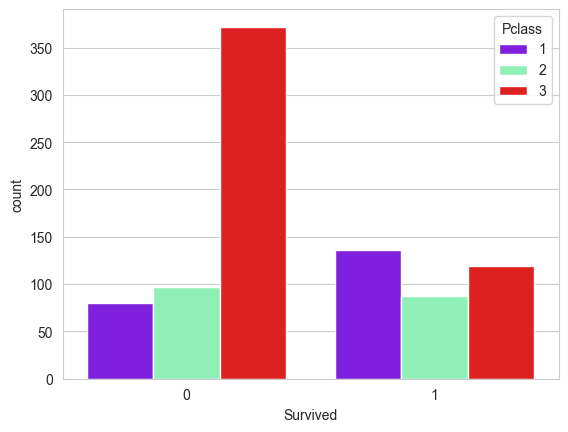

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

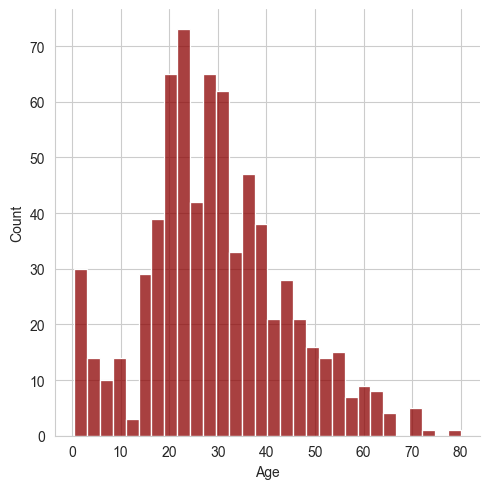

In [12]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

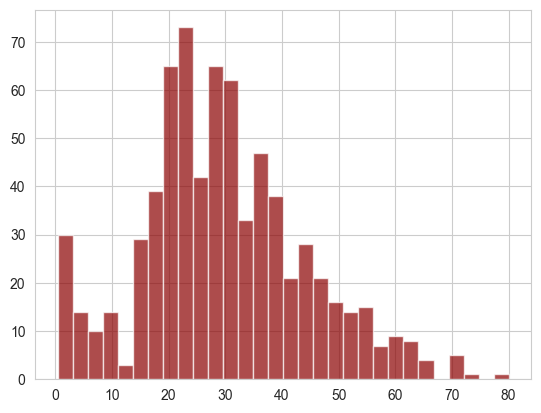

In [13]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)
plt.show()

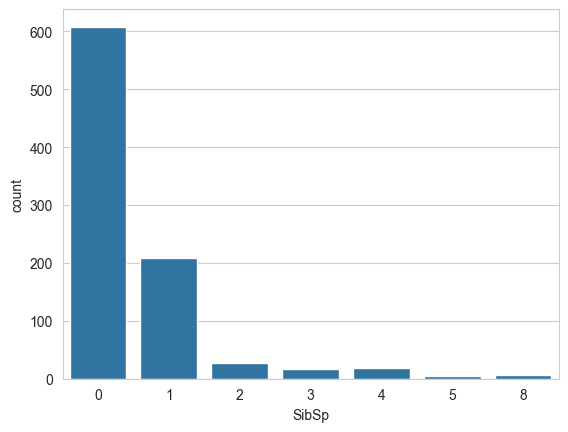

In [14]:
sns.countplot(x='SibSp',data=train)
plt.show()

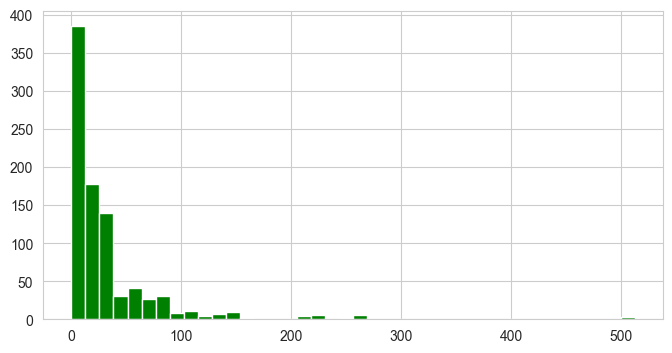

In [15]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [16]:
!pip install cufflinks


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\ranya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import cufflinks as cf
cf.go_offline()

In [18]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(0, 128, 0, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color: see https://plotly.com/python/css-colors/ for a list
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

___
## Nettoyage des Données

Nous voulons remplir les données d'âge manquantes plutôt que de simplement supprimer les lignes avec des données d'âge manquantes. Une façon de procéder est de remplir avec l'âge moyen de tous les passagers (imputation).

Cependant, nous pouvons être plus intelligents et vérifier l'âge moyen par classe de passager. Par exemple :

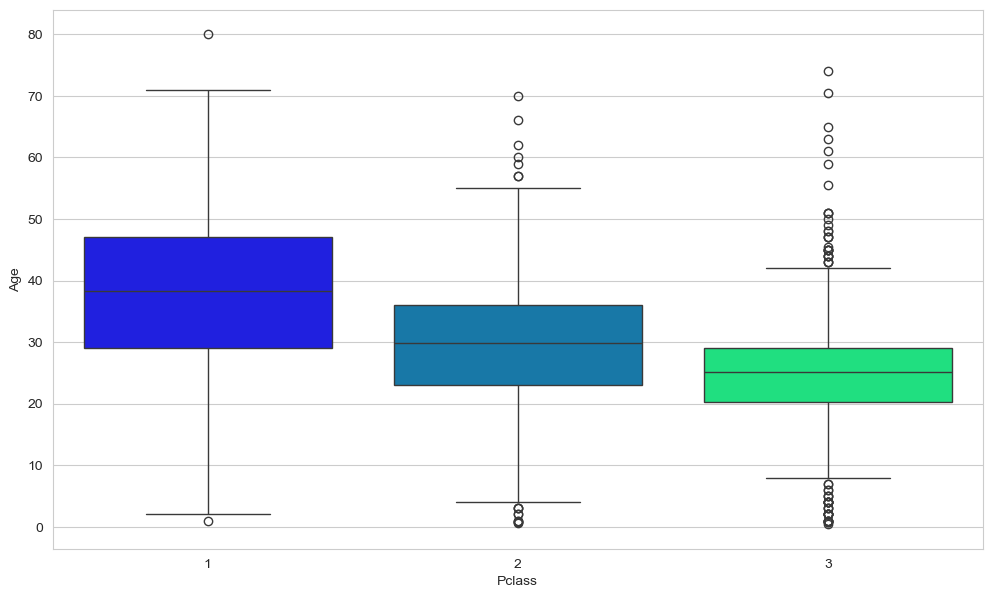

In [277]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, hue='Pclass', palette='winter', legend=False)
plt.show()

Nous pouvons observer que les passagers plus aisés dans les classes supérieures ont tendance à être plus âgés, ce qui est logique. Nous allons utiliser ces valeurs d'âge moyen pour imputer l'âge en fonction de la Pclass.

In [213]:
def impute_age(cols):
    age = cols['Age']      # Access by column name
    pclass = cols['Pclass'] # Access by column name
    
    if pd.isnull(age):
        if pclass == 1:
            return train[train['Pclass'] == 1]['Age'].mean()
        elif pclass == 2:
            return train[train['Pclass'] == 2]['Age'].mean()
        else:
            return train[train['Pclass'] == 3]['Age'].mean()
    else:
        return age

Maintenant, appliquons cette fonction !

In [215]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Maintenant, vérifions à nouveau cette heatmap !

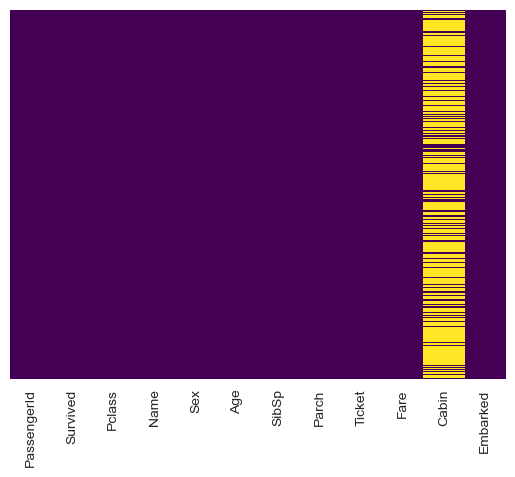

In [217]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

Parfait ! Supprimons maintenant la colonne Cabin et la ligne avec une valeur NaN dans Embarked.

In [219]:
train.drop('Cabin',axis=1,inplace=True)

In [221]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


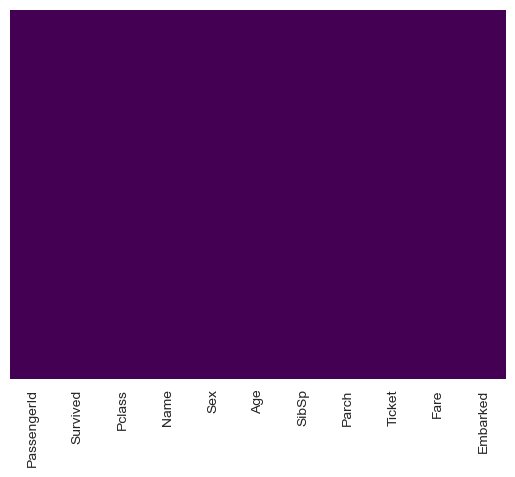

In [223]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [225]:
train.dropna(inplace=True)

## Conversion des Caractéristiques Catégorielles

Nous devrons convertir les caractéristiques catégorielles en variables dummy avec pandas ! Sinon, notre algorithme de machine learning ne pourra pas prendre directement ces caractéristiques en entrée.

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [229]:
 pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [231]:
pd.get_dummies(train['Sex']).astype(int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [233]:
sex = pd.get_dummies(train['Sex'],drop_first=True).astype(int)
embark = pd.get_dummies(train['Embarked'],drop_first=True).astype(int)

In [235]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [237]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [239]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [241]:
train = pd.concat([train,sex,embark],axis=1)

In [243]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Parfait ! Nos données sont prêtes pour notre modèle !

# Construction d'un modèle de régression logistique

Commençons par diviser nos données en un ensemble d'entraînement et un ensemble de test (il existe un autre fichier test.csv que vous pouvez utiliser si vous souhaitez utiliser toutes ces données pour l'entraînement).

## Division Entraînement-Test

In [245]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Entraînement et Prédiction

In [249]:
from sklearn.linear_model import LogisticRegression

In [253]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [255]:
predictions = logmodel.predict(X_test)

Passons maintenant à l'évaluation de notre modèle !

## Évaluation

Nous pouvons vérifier la précision, le rappel et le f1-score en utilisant le rapport de classification !

In [261]:
from sklearn.metrics import confusion_matrix

In [263]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 33,  71]])

**Précision globale** = (TP + TN) / Total = (71 + 149) / 267 = 82,4%

**Précision** = TP / (TP + FP) = 71 / (71 + 14) = 83,5%
Quand le modèle prédit positif, à quelle frequency a-t-il raison ?

**Rappel (Sensibilité)** = TP / (TP + FN) = 71 / (71 + 33) = 68,3%
Combien de positifs réels le modèle a-t-il capturés ?

**Score F1** = 2 × (Précision × Rappel) / (Précision + Rappel) = 75,1%

**Interprétation :**
Votre modèle est correct mais peut être amélioré :

✅ Bonne précision globale (82,4%)

✅ Bonne précision (83,5% - peu de fausses alarmes)

⚠️ Rappel modéré (68,3% - manque certains positifs réels)

Le modèle est assez conservateur - il est prudent pour prédire les positifs mais rate certains vrais positifs

Le contexte métier est important : Si les faux négatifs sont coûteux (ex : détection de maladies), il faudrait améliorer le rappel. Si les faux positifs sont coûteux (ex : filtrage du spam), votre précision actuelle est bonne.

In [1]:
from sklearn.metrics import classification_report

In [2]:
print(classification_report(y_test,predictions))

NameError: name 'y_test' is not defined

Pas mal ! Vous pourriez explorer d'autres techniques de feature engineering et le fichier titanic_text.csv. Quelques suggestions pour le feature engineering :

* Essayez d'extraire le Titre (Dr., M., Mme, etc.) du nom comme caractéristique
* Peut-être que la lettre de la Cabine pourrait être une caractéristique
* Y a-t-il des informations que vous pouvez tirer du ticket ?

## Excellent travail !